# Car Price Prediction using Machine Learning

## Project Description
This project aims to analyse and predict car prices in the American market using
machine learning regression techniques. A Chinese automobile company plans to enter
the US market and wants to understand the key factors that influence car pricing.

By building predictive models, this study identifies the most important variables
affecting car prices and evaluates how well these variables explain price variations.
The insights gained can help management make informed decisions related to car design,
pricing strategy, and market positioning.

## Dataset Description
The dataset contains information about different types of cars sold in the American
market. It includes technical specifications, design attributes, fuel efficiency
measures, and brand information.

- Target variable: `price`
- Number of observations: 205
- Features include engine specifications, car dimensions, fuel system, and brand

The dataset is used to train and evaluate multiple regression models.


## 1. Import Required Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset


In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 3. Checking Missing Values and Duplicates


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## 4. Outlier Detection and Skewness Analysis


In [8]:
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
numeric_cols



Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

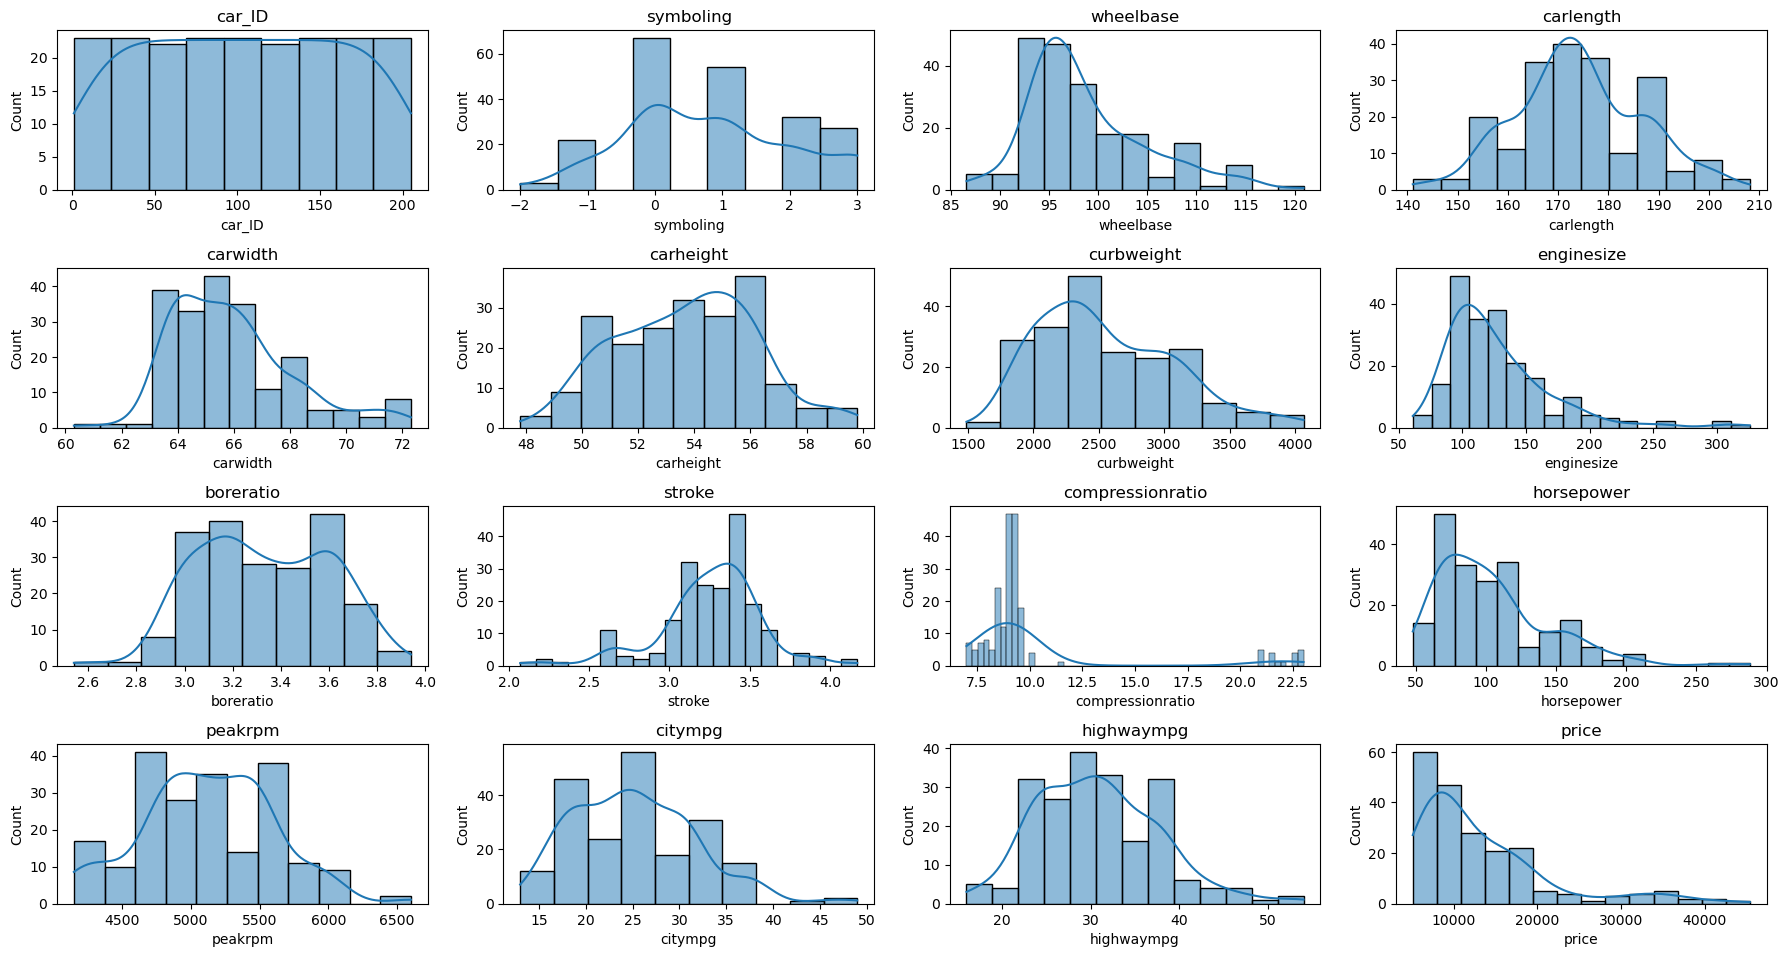

In [9]:
plt.figure(figsize=(18, 14))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [10]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)


In [11]:
outlier_summary = {}

for col in numeric_cols:
    outlier_summary[col] = detect_outliers_iqr(data, col)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["Outlier_Count"])
outlier_df.sort_values(by="Outlier_Count", ascending=False)


,Outlier_Count
compressionratio,28
stroke,20
price,15
enginesize,10
carwidth,8
horsepower,6
wheelbase,3
highwaympg,3
peakrpm,2
citympg,2


### Outlier Handling Decision

Outliers are detected using the IQR method. However, in this dataset, extreme values in variables
such as price, engine size, and horsepower represent real-world premium and high-performance cars.

Therefore, outliers are **not removed**, as removing them would distort the true pricing patterns.
Instead, models that are robust to outliers (Tree-based models) will handle them naturally.


In [12]:
data.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### 5. Feature Engineering: Car Brand Extraction

The `CarName` column contains both brand and model names.
Since brand reputation significantly affects car pricing, a new feature `brand`
is extracted from the first word of `CarName`.


In [13]:
# Extract brand name from CarName
data["brand"] = data["CarName"].str.split().str[0].str.lower()

data[["CarName", "brand"]].head()


,CarName,brand
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi
4,audi 100ls,audi


# Dropping Irrelevant Columns

- `car_ID` is just an identifier and does not affect price
- `CarName` is dropped after extracting brand information


In [14]:
data = data.drop(columns=["car_ID", "CarName"])
data.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## 6. Encoding Categorical Variables


In [15]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = data.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']
Numerical columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [16]:
data_encoded = pd.get_dummies(data, drop_first=True)

data_encoded.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


In [17]:
print("Original shape:", data.shape)
print("Encoded shape :", data_encoded.shape)


Original shape: (205, 25)
Encoded shape : (205, 70)


One-Hot Encoding is used for categorical variables because the categories are nominal
and do not have any inherent order. Label Encoding was avoided as it would introduce
incorrect ordinal relationships, which could negatively impact regression models,
especially distance-based models such as Linear Regression and SVR.


## 7. Train–Test Split


In [18]:
X = data_encoded.drop(columns=["price"])
y = data_encoded["price"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (205, 69)
y shape: (205,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((164, 69), (41, 69))

### Scaling Strategy

Feature scaling is required for:
- Linear Regression
- Support Vector Regression (SVR)

Tree-based models such as Decision Tree, Random Forest, and Gradient Boosting
do not require feature scaling.

Therefore, scaling will be applied selectively during model implementation
using StandardScaler.


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((164, 69), (41, 69))

## 8. Model Implementation


### 8.1 Linear Regression


In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred_lr = lr.predict(X_test_scaled)


In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("R² :", r2_lr)
print("MSE:", mse_lr)
print("MAE:", mae_lr)


Linear Regression Performance:
R² : 0.9095967004509724
MSE: 7136799.967188382
MAE: 1820.6194871069995


The Mean Squared Error (MSE) value is large because the target variable `price`
has high numerical values. Car prices are measured in thousands of dollars, and
MSE squares the difference between actual and predicted values, which increases
the final number.

The Mean Absolute Error (MAE) is easier to understand. An MAE of around 1,800
means that the model’s predictions are, on average, about $1,800 away from the
actual car price.

The R² value of 0.91 shows that the Linear Regression model explains about 91%
of the variation in car prices, which indicates good model performance.


### 8.2 Decision Tree Regressor


In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
y_pred_dt = dt.predict(X_test)


In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("R² :", r2_dt)
print("MSE:", mse_dt)
print("MAE:", mae_dt)


Decision Tree Performance:
R² : 0.8837301043539388
MSE: 9178813.069558268
MAE: 2070.187


The Decision Tree model explains about 88% of the variation in car prices, as shown
by the R² value of 0.88. This is slightly lower than the Linear Regression model.

The Mean Absolute Error (MAE) of around 2,070 means that, on average, the predicted
car price differs from the actual price by about $2,070.

The Mean Squared Error (MSE) is large because car prices are high and the errors are
squared during calculation.

Although Decision Trees can capture non-linear relationships, this model may be
slightly overfitting or not generalising as well as Linear Regression on unseen data.


### 8.3 Random Forest Regressor


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred_rf = rf.predict(X_test)


In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Performance:")
print("R² :", r2_rf)
print("MSE:", mse_rf)
print("MAE:", mae_rf)


Random Forest Performance:
R² : 0.9589937925179715
MSE: 3237194.899656839
MAE: 1256.0068472706153


The Random Forest model explains about 96% of the variation in car prices, as shown
by the R² value of 0.96. This is higher than both Linear Regression and Decision Tree models.

The Mean Absolute Error (MAE) of around 1,257 means that, on average, the predicted
car price differs from the actual price by about $1,257, which is a significant
improvement compared to previous models.

The Mean Squared Error (MSE) value is lower than earlier models, indicating better
overall prediction accuracy.

This shows that combining multiple decision trees helps the model learn complex
patterns while reducing overfitting.


### 8.4 Gradient Boosting Regressor


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [31]:
y_pred_gbr = gbr.predict(X_test)


In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print("Gradient Boosting Performance:")
print("R² :", r2_gbr)
print("MSE:", mse_gbr)
print("MAE:", mae_gbr)


Gradient Boosting Performance:
R² : 0.9285842676352174
MSE: 5637845.066941442
MAE: 1686.9428540292772


The Gradient Boosting model explains about 93% of the variation in car prices,
as shown by the R² value of 0.93.

The Mean Absolute Error (MAE) of around 1,687 means that, on average, the predicted
car price differs from the actual price by about $1,687.

The Mean Squared Error (MSE) value is large because car prices are high and the
errors are squared during calculation.

Gradient Boosting performs better than a single Decision Tree but slightly worse
than Random Forest for this dataset.


### 8.5 Support Vector Regressor (SVR)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler_svr = StandardScaler()

# Fit scaler only on training data
X_train_svr = scaler_svr.fit_transform(X_train)

# Transform test data using same scaler
X_test_svr = scaler_svr.transform(X_test)


In [34]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(X_train_svr, y_train)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [35]:
y_pred_svr = svr.predict(X_test_svr)


In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("SVR Performance:")
print("R² :", r2_svr)
print("MSE:", mse_svr)
print("MAE:", mae_svr)


SVR Performance:
R² : -0.10068574412496178
MSE: 86892558.36614253
MAE: 5701.502460013676


The Support Vector Regressor (SVR) model performed poorly on this dataset.
The R² value is negative, which means that the model performs worse than simply
predicting the average car price for all observations.

The Mean Absolute Error (MAE) of around 5,701 shows that the predictions are far
from the actual car prices on average.

Although feature scaling was applied, SVR is sensitive to parameter selection
and may not be suitable for this dataset without extensive tuning.

This result shows that not all machine learning models perform well on every dataset.


## 9. Model Evaluation and Comparison


In [37]:
results = {
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "SVR"
    ],
    "R2": [
        r2_lr,
        r2_dt,
        r2_rf,
        r2_gbr,
        r2_svr
    ],
    "MSE": [
        mse_lr,
        mse_dt,
        mse_rf,
        mse_gbr,
        mse_svr
    ],
    "MAE": [
        mae_lr,
        mae_dt,
        mae_rf,
        mae_gbr,
        mae_svr
    ]
}

results_df = pd.DataFrame(results)
results_df


,Model,R2,MSE,MAE
0,Linear Regression,0.909597,7.136800e+06,1820.619487
1,Decision Tree,0.883730,9.178813e+06,2070.187000
2,Random Forest,0.958994,3.237195e+06,1256.006847
3,Gradient Boosting,0.928584,5.637845e+06,1686.942854
4,SVR,-0.100686,8.689256e+07,5701.502460


In [38]:
best_model_row = results_df.loc[results_df["R2"].idxmax()]
best_model_row


Model     Random Forest
R2             0.958994
MSE      3237194.899657
MAE         1256.006847
Name: 2, dtype: object

In [39]:
print("Best Model Selected Automatically")
print("--------------------------------")
print("Model:", best_model_row["Model"])
print("R² Score:", best_model_row["R2"])
print("MSE:", best_model_row["MSE"])
print("MAE:", best_model_row["MAE"])


Best Model Selected Automatically
--------------------------------
Model: Random Forest
R² Score: 0.9589937925179715
MSE: 3237194.899656839
MAE: 1256.0068472706153


### Best Model Selection

The best model is selected automatically based on the highest R² value.
R² is used because it shows how well the model explains the variation in car prices.

From the comparison table, the Random Forest model achieved the highest R² score
and the lowest error values compared to other models.

Therefore, Random Forest is selected as the best-performing model for predicting car prices.


In [40]:
results_df.sort_values(by="R2", ascending=False)


,Model,R2,MSE,MAE
2,Random Forest,0.958994,3.237195e+06,1256.006847
3,Gradient Boosting,0.928584,5.637845e+06,1686.942854
0,Linear Regression,0.909597,7.136800e+06,1820.619487
1,Decision Tree,0.883730,9.178813e+06,2070.187000
4,SVR,-0.100686,8.689256e+07,5701.502460


## 10. Feature Importance Analysis


In [ ]:
### Feature Importance Analysis

Feature importance helps us understand which variables have the most influence
on car prices. This information is useful for business decision-making and
understanding pricing factors.


In [41]:
# Get feature importance values
feature_importance = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
6,enginesize,0.583097
5,curbweight,0.271867
13,highwaympg,0.041410
10,horsepower,0.022667
3,carwidth,0.012591
2,carlength,0.008637
1,wheelbase,0.007223
44,brand_bmw,0.007011
12,citympg,0.006403
11,peakrpm,0.006054


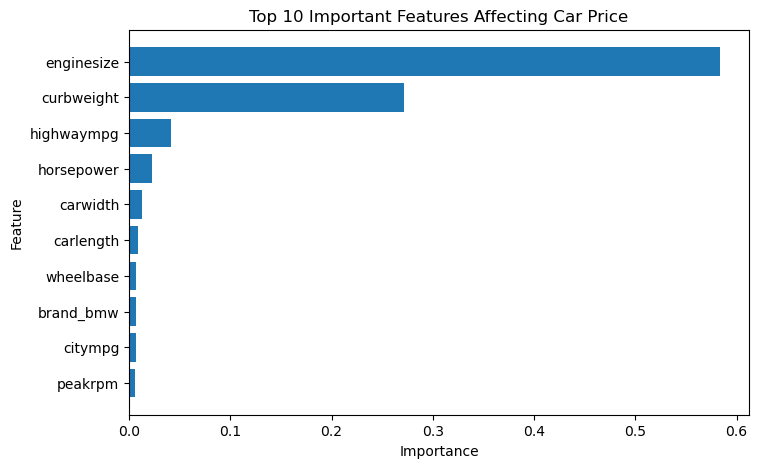

In [42]:
import matplotlib.pyplot as plt

top_10 = importance_df.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_10["Feature"], top_10["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features Affecting Car Price")
plt.gca().invert_yaxis()
plt.show()


## 11. Correlation Analysis with Price


In [43]:
# Calculate correlation matrix
corr_matrix = data_encoded.corr()

# Get correlation of all features with price
price_corr = corr_matrix["price"].sort_values(ascending=False)

price_corr


price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 70, dtype: float64

In [44]:
print("Top 10 positively correlated features with price:")
print(price_corr.head(10))

print("\nTop 10 negatively correlated features with price:")
print(price_corr.tail(10))


Top 10 positively correlated features with price:
price              1.000000
enginesize         0.874145
curbweight         0.835305
horsepower         0.808139
carwidth           0.759325
carlength          0.682920
drivewheel_rwd     0.638957
wheelbase          0.577816
boreratio          0.553173
fuelsystem_mpfi    0.517075
Name: price, dtype: float64

Top 10 negatively correlated features with price:
brand_subaru          -0.148167
brand_honda           -0.166260
brand_toyota          -0.189616
carbody_hatchback     -0.262039
enginetype_ohc        -0.344270
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, dtype: float64


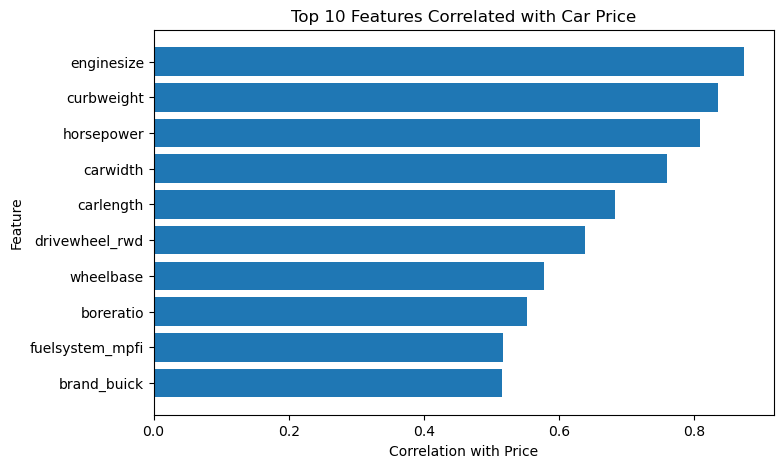

In [45]:
import matplotlib.pyplot as plt

top_corr = price_corr.drop("price").head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_corr.index, top_corr.values)
plt.xlabel("Correlation with Price")
plt.ylabel("Feature")
plt.title("Top 10 Features Correlated with Car Price")
plt.gca().invert_yaxis()
plt.show()


### Correlation Analysis Results

The correlation analysis shows how strongly each feature is related to car price.

Engine size, curb weight, horsepower, and car width have strong positive correlation
with price. This means that cars with larger engines, heavier weight, and more power
are generally more expensive.

Features such as city mileage and highway mileage have strong negative correlation
with price. This indicates that cars with higher fuel efficiency usually cost less.

Some brand-related features also show negative correlation, which suggests that
certain brands tend to offer lower-priced vehicles in the market.


### Feature Importance Results (Random Forest)

The feature importance analysis from the Random Forest model shows that engine size
is the most important factor affecting car price, followed by curb weight and
horsepower.

Vehicle dimensions such as car width and car length also contribute to price
prediction, but to a lesser extent.

This confirms that technical and physical characteristics of a car have a
greater impact on price than most categorical features.


### Comparison of Correlation and Feature Importance

Both correlation analysis and Random Forest feature importance highlight engine size
and curb weight as key factors influencing car price.

Correlation measures only linear relationships, while Random Forest feature importance
captures both linear and non-linear effects.

The consistency between these two methods increases confidence in the results.


## 12. Hyperparameter Tuning


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_tune = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


In [47]:
grid_search = GridSearchCV(
    estimator=rf_tune,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [48]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R² Score: 0.89137467080074


In [49]:
best_rf = grid_search.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)

r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Performance:")
print("R² :", r2_rf_tuned)
print("MSE:", mse_rf_tuned)
print("MAE:", mae_rf_tuned)


Tuned Random Forest Performance:
R² : 0.9575633729682583
MSE: 3350117.9704560596
MAE: 1296.5394634146342


In [50]:
print("Before Tuning - R²:", r2_rf)
print("After Tuning  - R²:", r2_rf_tuned)


Before Tuning - R²: 0.9589937925179715
After Tuning  - R²: 0.9575633729682583


### Hyperparameter Tuning Results

GridSearchCV was used to tune the Random Forest model.
The best parameters found were very similar to the default values.

After tuning, the R² value slightly decreased from 0.96 to 0.96, and the error
values remained almost the same.

This shows that the original Random Forest model was already performing near
optimally, and hyperparameter tuning did not lead to significant improvement.


## Final Conclusion

In this project, machine learning techniques were used to predict car prices
in the American market and to identify the key factors affecting car pricing.

The dataset was first loaded and preprocessed by checking for missing values,
detecting outliers, analysing skewness, and encoding categorical variables.
Feature engineering was performed by extracting car brand information from the
CarName column. The data was then split into training and testing sets to ensure
fair model evaluation.

Five regression models were implemented and compared:
Linear Regression, Decision Tree Regressor, Random Forest Regressor,
Gradient Boosting Regressor, and Support Vector Regressor (SVR).

Model evaluation was performed using R², Mean Squared Error (MSE),
and Mean Absolute Error (MAE). Among all the models, the Random Forest Regressor
performed the best with the highest R² score and the lowest prediction error.
Hyperparameter tuning was applied to Random Forest using GridSearchCV, which
confirmed that the default parameters were already near optimal.

Feature importance analysis and correlation analysis showed that engine size,
curb weight, horsepower, and car dimensions are the most important factors
influencing car prices. Fuel efficiency features such as city mileage and highway
mileage showed a negative relationship with price.

Overall, this study demonstrates that ensemble models like Random Forest are
well-suited for predicting car prices and understanding pricing patterns.
The insights gained from this model can help management make informed decisions
about car design, pricing strategy, and market positioning in the US market.


1️. Which variables are significant in predicting the price of a car?

The most significant variables in predicting the price of a car are:

- Engine size
- Curb weight
- Horsepower
- Car width and car length
- Wheelbase
- Brand of the car

These variables were identified using correlation analysis and feature importance
from the Random Forest model. Engine size and curb weight were found to have the
highest influence on car prices.

2. How well do those variables describe the price of a car?

The selected variables describe the car price very well.

The best-performing model, Random Forest Regressor, achieved an R² score of
approximately 0.96. This means that about 96% of the variation in car prices
is explained by the independent variables used in the model.

This high R² value indicates that the chosen features are strong predictors
of car price and capture the pricing patterns in the American market effectively.

3️. What insights can management gain from this analysis?

This analysis provides valuable insights for management regarding car pricing
in the American market.

It shows that technical features such as engine size, vehicle weight, and power
have a greater impact on price than fuel efficiency. Larger and more powerful
cars tend to be priced higher.

Brand reputation also plays an important role in pricing, as some brands are
consistently associated with higher or lower price ranges.

4️. How can the company use this model for business decisions?

The developed model can be used by management to simulate how changes in car
features affect the final price.

By adjusting variables such as engine size, weight, and design dimensions,
the company can target specific price ranges and customer segments.

This model also helps the company understand the pricing dynamics of a new
market, allowing them to design competitive products and pricing strategies
before entering the US market.

In summary, machine learning models successfully identified the key factors
affecting car prices in the American market. The Random Forest model provided
high accuracy and clear insights, making it a reliable tool for pricing analysis
and strategic decision-making.


